# Inaugural Project

First we import the nessecary modules, and our own functions defined in other .py-files

In [32]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.optimize
import mpl_toolkits.mplot3d
import ipywidgets
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D # Used implictely when doing 3D plots

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from Household import  HouseholdSpecializationModelClass
from Qone import Q_1plot
from Qfive import Qfive

# We import our class as model
model = HouseholdSpecializationModelClass()
model5 = Qfive()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

In the following, we illustrate how the relative hours worked by women at home compared to men's change as $\alpha$ and $\sigma$ are varied. 

For the code to function, we have altered line 57 in the Household.py file, such at it not only decribes the case where the $\sigma$=1. But, also the $\sigma$=0 and neither 1 nor 0.

with an alpha = 0.25 and a sigma = 0.5, we get that HF/HM = 3.00 / 5.50 = 0.55
with an alpha = 0.25 and a sigma = 1.0, we get that HF/HM = 2.00 / 6.50 = 0.31
with an alpha = 0.25 and a sigma = 1.5, we get that HF/HM = 1.50 / 7.00 = 0.21
with an alpha = 0.5 and a sigma = 0.5, we get that HF/HM = 4.50 / 4.50 = 1.00
with an alpha = 0.5 and a sigma = 1.0, we get that HF/HM = 4.50 / 4.50 = 1.00
with an alpha = 0.5 and a sigma = 1.5, we get that HF/HM = 4.50 / 4.50 = 1.00
with an alpha = 0.75 and a sigma = 0.5, we get that HF/HM = 5.50 / 3.00 = 1.83
with an alpha = 0.75 and a sigma = 1.0, we get that HF/HM = 6.50 / 2.00 = 3.25
with an alpha = 0.75 and a sigma = 1.5, we get that HF/HM = 7.00 / 1.50 = 4.67


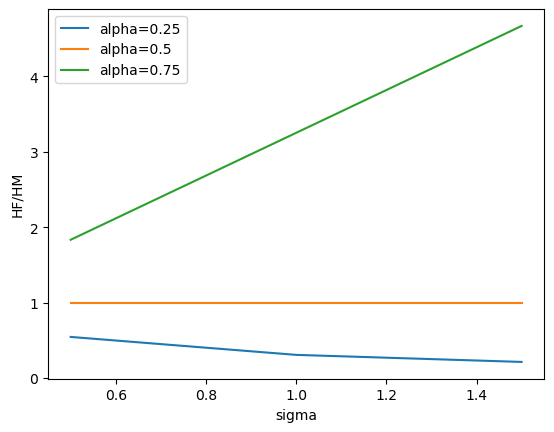

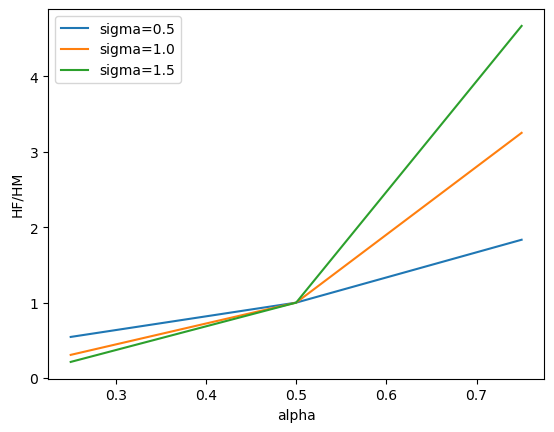

In [33]:
# 1. define the values of alpha and sigma to be used
alpha_list = [0.25, 0.50, 0.75]
sigma_list = [0.5, 1.0, 1.5]

# 2. call the function
resultsHF, resultsHM, resultsHFHNM = Q_1plot(alpha_list, sigma_list)

**$\large \color{lightblue}{Interpretation}$**

The parameter $\alpha$ pertains to the productivity in the home production for females relative to males, $\frac{\alpha}{1-\alpha}$. Call this ratio $\xi$. For the given values of $\alpha$, the productivity in the home production is:
-  $\xi_{\alpha=0.25}=0.25/0.75=0.33$
-  $\xi_{\alpha=0.5}=0.5/0.5=1$
-  $\xi_{\alpha=0.75}=0.75/0.25=3$

For a given elasticity of substition, $\sigma$, the productivity in home production increases as $\alpha$ increases. $\alpha$ illustrates how much home work of women weighs in the total consumption of home production. As the productivity in home production increases in $\alpha$, i.e. when work of women weighs more than work of men, women work more productively at home relative to men. 


For $\alpha$ > 0.5 the return from women working at home is larger than the return from men doing so, and vice versa when $\alpha$ < 0.5. When $\alpha$ = 0.5, the return on home production is the same for men and women. 
In the case where $\alpha $ > 0.5, women will take on a relatively larger part of the home work, as the elasticity of substitution, $\sigma$, increases. Similarly for $\alpha $ < 0.5, men take on a larger part of the home work. 


The elasticity of substitution, $\sigma$, does not affect the ratio of house work of women to house work of men when, so long as the return on women's and men's home work is the same, i.e. $\alpha$ = 0.5.

# Question 2

In the following we make a plot displaying the relation between the relative wage and the $H_F/H_M$ for a decrete distribution of hours,i.e. $H_F, H_M \in [0 ,0.5 ,1 ,...,23.5 ,24]$.

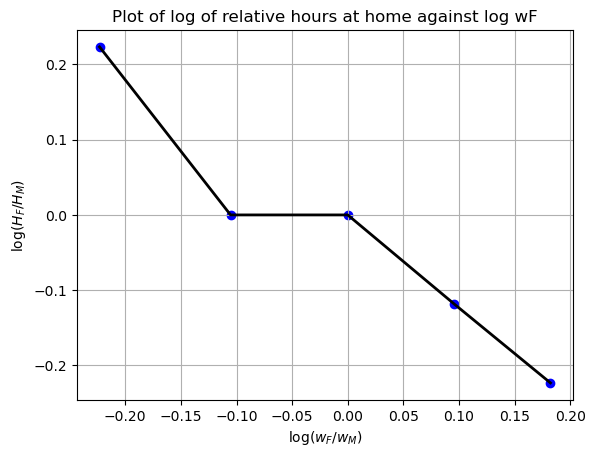

In [34]:
model.par.alpha = 0.5
model.par.sigma = 1
model.solution_wF_vec(discrete=True, do_plot=True, do_print=True)

**$\large \color{lightblue}{Interpretation}$**

The lower the wages of females are, the lower the logarithmic relative wages between women and men are and the higher the logarithmic relative home work between women and men are. 

As the wages of women increase, the relative wages increase and the hours spent working at home for women drecrease relatively to men. When $w_F=1$, men and women spend the same amount of hours working at home. When men and women earn the same wage, neither men or women have a comparative advantage in working at home or in the market.

Further, when woman make 0.9 the men and woman work the same amount of ours in home production. This is an unintutive result, which probably stems from the discrete modelling framwork. 

# Question 3

In the following we will remake the plot from Question 2 only with a continuous choice set, i.e. $L_M, L_F, H_M, H_F \in [0,24]$.

We use the module "from scipy import optimize" in the continous solution. 

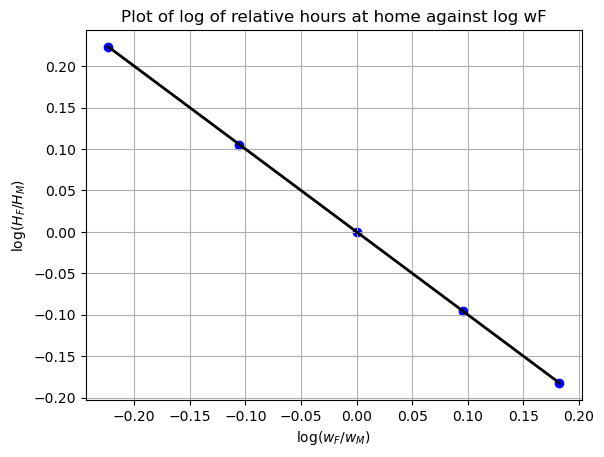

In [35]:
model.solution_wF_vec(do_plot=True)

**$\large \color{lightblue}{Interpretation}$**

The interpretation is identical to the one in Q2 only now we do not have the unintuitive "flat spot", between the $w_f = 0.9$ and $w_f = 1$.

# Question 4

$Log(H_F/H_M) = \beta_0 + \beta_1 Log(w_F/w_M)$

We solve this with the discrete model. 

In the following code the expression: $(\beta_0 - (\beta\hat)_0)^2+(\beta_1 - (\beta\hat)_1)^2$ is minimized by checking different values of $\sigma$ and $\alpha$.

The values of $\sigma$ and $\alpha$, $\beta_0$ and $\beta_1$, and the value of $(\beta_0 - (\beta\hat)_0)^2+(\beta_1 - (\beta\hat)_1)^2$ is reported each time a new combination of $\sigma$ and $\alpha$ results in a smaller value of $(\beta_0 - (\beta\hat)_0)^2+(\beta_1 - (\beta\hat)_1)^2$. 

Optimized Parameter Values:
Alpha = 0.9820
Sigma = 0.1000
The Resulting Estimate Values:
Beta0 = 0.4000
Beta1 = -0.1000
The optimal value of H_F/H_M is:
H_F/H_M = 1.4918
The Minimized Value Resulting from the Optimization:
Squared Residual = 0.0000


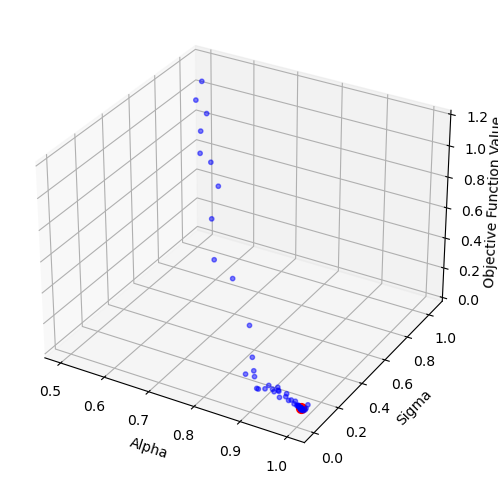

In [36]:
model.estimate(do_print=True,do_plotb=True)

$$ \log(HF/HM) = 0.40 - 0.1 \log(w_f/w_m) $$ 

The optimal value of $\alpha$ is $0.982$. Meaning that woman are the more productive in home production. Hence, they will take a relativly large fraction of the production in the home.  

-  $\xi_{\alpha=0.982}=0.982/0.018=55.56$

The woman are 55.56 times more productive in home production than the men. 

Additionally, as the $\alpha \neq 0.5$ the optimal value of $\sigma = 0.1$ affects the ratio $HF/HM$. 

In most cultures woman do work more in home production than men. However, the finding that woman should be dramatically more producive than men is probably far from reality. In the following question we assume that men and woman are equally productive, which most likely is the better approximation. 

# Question 5

In this we suggest and implement an extension of the model, and analyze whether or not it can help match the data when α = 0.5. α = 0.5 implies that men and woman are equally productive in home porduction.  

The extension we try out is an extra disutility from working at home.

So, the disutility term becomes:

$disutility = \nu(\frac{TM^{1+1/\epsilon}}{{1+1/\epsilon}}+(\frac{TF^{1+1/\epsilon}}{{1+1/\epsilon}}) + \hat \nu HM + (1-\hat \nu)HF$, 
where $\hat \nu \leq 1 $


Optimized Parameter Values:
Alpha = 0.5000
Sigma = 1.2749
New_nu = 0.5797
The Resulting Estimate Values:
Beta0 = 0.4011
Beta1 = -0.0269
The optimal value of H_F/H_M is:
H_F/H_M = 1.4934
The Minimized Value Resulting from the Optimization:
Squared Residual = 0.0053


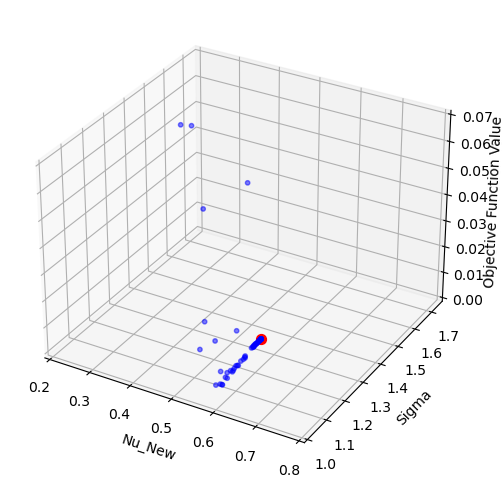

In [37]:
model5.estimateQfive(do_print=True,do_plotb=True)

$$ \log(HF/HM) = 0.4011 - 0.0269 \log(w_f/w_m) $$ 

When the $(w_f/w_m)$ increases by $1$ pct. the $(HF/HM)$ decrease by $-0.0269$ pct. 

When woman get a higher wage relative to men, the amount men work in home production increases. 

The added variable $\hat \nu$ takes the optimal value $0.5797$. Meaning that men working at home results in a slightly greater disutility than woman. 

Relative to Q4 the optimal fraction of $(HF/HM)$ increases from $1.4918$ to $1.4934$. Hence, under the assumption that men and woman are equally productive in home production, and with the incluion of the extra disutility term, woman work more in home production realtive to men. 

The squared residual increases from $0$ to $0.0053$ which is trivial, as this is calculated as the difference between the estimated $\beta's$ and the targets of $0.4$ and $-0.1$. 

Given that the ciritical assumption $\alpha = 0.5$ seems more appropriate, the model Q5 seems better. 
